In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go # or plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
top_us = pd.read_csv(r'../output/2021.01.23 spotify_us_all_fe.csv',
                    index_col=0)
top_us = top_us[top_us['No. of Artists'] >= 2]
top_us['Date'] = pd.to_datetime(top_us['Date'])

In [3]:
top_us['No. of Artists'].unique()

array([ 2,  3,  6,  5,  4,  8,  7, 22, 11, 10, 13])

In [4]:
# top_us

<Figure size 720x432 with 0 Axes>

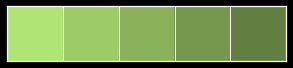

In [37]:
plt.style.use("dark_background")
# sns.set(rc={'figure.figsize':(10,6)})
plt.figure(figsize=(10,6))

custom_color = ['#b0e575', '#9dcb68', '#89b25b', '#76984e', '#627f41']
sns.set_palette(custom_color)
sns.palplot(sns.color_palette())

### Chart 2B - Genre metrics - Top 5 most successful genres

In [6]:
data1 = top_us.copy()

# Clean up genre
data1['Artist Genre'] = data1['Artist Genre'].str.replace("\[|\]|\'", "")
data1['Artist Genre'] = data1['Artist Genre'].str.replace(",\s", ",")
data1['Artist Genre'] = data1['Artist Genre'].str.split(",")

# Explode so that each genre is on a separate row
data1b = data1.explode('Artist Genre')

In [8]:
data1c = data1b.copy()
data1c = data1c[['Date', 'Track Name', 'Artist Name', 'Artist Genre', 
                 'Streams', 'Position', 'Revenue']]\
.drop_duplicates()

In [10]:
data1d = data1c.groupby(['Artist Genre'])[['Streams', 'Position', 'Revenue']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Revenue": "Avg Revenue"})

In [11]:
data1e = data1c.groupby(['Artist Genre'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [12]:
data1f = data1d.merge(data1e, how = 'inner', on = ['Artist Genre'])\
.sort_values(by = 'Count', ascending=False)
data1f

,Artist Genre,Avg Streams,Avg Position,Avg Revenue,Count
72,rap,417245.833413,94.905543,1381.083709,135299
84,pop rap,406564.733375,96.237640,1345.729267,96945
95,trap,399475.247496,97.217646,1322.263069,95444
120,pop,392294.179908,96.855892,1298.493735,87011
92,hip hop,403521.837626,97.208983,1335.657283,72561
...,...,...,...,...,...
455,uk metalcore,251855.000000,181.000000,833.640050,1
327,pop argentino,302996.000000,109.000000,1002.916760,1
335,modern salsa,299656.000000,105.000000,991.861360,1
336,abstract hip hop,299656.000000,105.000000,991.861360,1


Text(0.5, 1.0, 'Top 5 Genres with Highest Frequency on Chart')

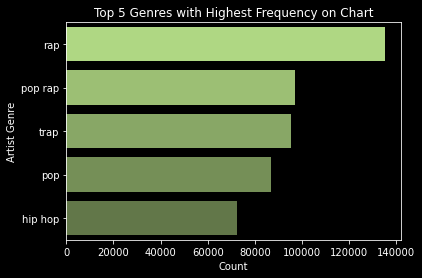

In [13]:
sns.barplot(data = data1f.iloc[0:5], 
            x = 'Count', y = 'Artist Genre')\
.set_title("Top 5 Genres with Highest Frequency on Chart")

Text(0.5, 1.0, 'Top 5 Genres with Highest Average Daily Revenue')

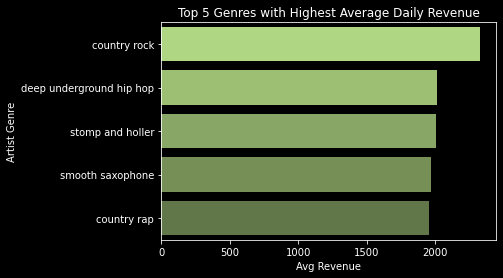

In [15]:
sns.barplot(data = data1f\
            .sort_values(by='Avg Revenue', ascending=False)\
            .iloc[0:5], 
            x = 'Avg Revenue', y = 'Artist Genre')\
.set_title("Top 5 Genres with Highest Average Daily Revenue")

The top 5 most frequently appearing genres in the US Top 200 are rap, pop rap, trap, pop, and hip hop. 
However, when ranking by average daily streams or profits, the top 5 genres are country rock, deep underground hip hop, stomp and holler, smooth saxophone, and queer country. \
This is probably due to the fact that genres like rap and pop are incredibly common and can occur at any position in the chart (top or bottom), which would pull the average streams down. On the other hand, more esoteric genres are less likely to occur, and as such are less likely to have their average streams diluted. If a very popular song happens to be associated with this genre, then that song's popular record are less likely to be averaged out.

### Chart 3B - Top Artists in Top Genres

In [17]:
data1g = data1c.groupby(['Artist Genre', 'Artist Name'])[['Streams', 'Position', 'Revenue']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Revenue": "Avg Revenue"})

In [18]:
data1h = data1c.groupby(['Artist Genre', 'Artist Name'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [19]:
data1i = data1g.merge(data1h, how = 'inner', on = ['Artist Genre', 'Artist Name'])\
.sort_values(by = 'Count', ascending=False)
# this will show all combinations of genres and artists

In [20]:
# only select the top 5 genres shown in data1f
data1j = data1i[data1i['Artist Genre'].isin(data1f['Artist Genre'].iloc[0:5])]\
.sort_values(by = ['Artist Genre', 'Avg Streams'], ascending=False) #change the second variable to sort by a different metric
data1j.groupby(['Artist Genre']).head(5)

,Artist Genre,Artist Name,Avg Streams,Avg Position,Avg Revenue,Count
9,trap,Don Toliver,761405.008734,42.851528,2520.250579,229
30,trap,Clipse,624884.526316,77.736842,2068.367782,19
49,trap,BlocBoy JB,598617.360071,74.864528,1981.423462,561
69,trap,Young M.A,562795.733333,74.400000,1862.853877,15
73,trap,Swae Lee,561478.742452,66.937011,1858.494638,2683
8,rap,Don Toliver,761405.008734,42.851528,2520.250579,229
18,rap,THE SCOTTS,663480.736111,63.787037,2196.121237,216
26,rap,Clipse,624884.526316,77.736842,2068.367782,19
39,rap,Jack Harlow,610394.855596,53.000000,2020.406972,277
44,rap,BlocBoy JB,598617.360071,74.864528,1981.423462,561


### Chart 2A - Top Collabs (tabular, no chart)

In [21]:
data2 = top_us.copy()
data2 = data2[['Date', 'Track Name', 'Artist No.', 'Artist Name',
              'Streams', 'Position', 'Revenue']].drop_duplicates()
data2['Artist No.'] = data2['Artist No.'].astype(str).apply(lambda x: x.zfill(2))

In [22]:
# Convert data2 to wide format so that all artists in each song as side by side
data2b = (data2.pivot_table(index=['Date', 'Track Name'], 
                      columns=['Artist No.'], 
                      values=['Artist Name'], 
                      aggfunc='first'))
data2b.columns = [''.join(col) for col in data2b.columns]
data2b = data2b.reset_index()

In [23]:
data2c = data2b.copy()

# Concatenate all artist names into one column, removing nans as needed
data2c['Artist_All'] = data2c["Artist Name01"].str\
.cat(data2c.iloc[:, 3:23].astype(str), sep=", ")

data2c['Artist_All'] = data2c['Artist_All'].str.replace('nan, |nan', '')

In [24]:
data2d = data2.merge(data2c[['Date', 'Track Name', 'Artist_All']],
                    how = 'left', on = ['Date', 'Track Name'])

data2d = data2d.drop(columns = ['Artist No.', 'Artist Name']).drop_duplicates()

In [25]:
data2e = data2d.groupby(['Artist_All'])[['Streams', 'Position', 'Revenue']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Revenue": "Avg Revenue"})

In [26]:
data2f = data2d.groupby(['Artist_All'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [27]:
data2g = data2e.merge(data2f, how = 'left', on = ['Artist_All'])\
.sort_values(by=['Count'], ascending=False)

In [28]:
data2g

,Artist_All,Avg Streams,Avg Position,Avg Revenue,Count
217,"Post Malone, Quavo,",455890.908233,88.076329,1508.998906,1166
532,"XXXTENTACION, Trippie Redd,",359463.470233,107.975841,1189.824086,1159
38,"Post Malone, 21 Savage,",611507.809565,73.001739,2024.090850,1150
416,"Billie Eilish, Khalid,",383749.324435,79.494867,1270.210264,974
119,"Lil Baby, Gunna,",504974.627615,80.482218,1671.466017,956
...,...,...,...,...,...
1311,"Carnage, G-Eazy, Wiz Khalifa, Prinze George,",276225.000000,149.000000,914.304750,1
1854,"Zac Brown Band, Jimmy Buffett,",228979.000000,195.000000,757.920490,1
1853,"GoldLink, Khalid,",229059.000000,192.000000,758.185290,1
1312,"Gryffin, Audrey Mika,",276095.000000,138.000000,913.874450,1


### Chart 2C - Top Tracks over time

In [29]:
data3 = top_us.copy()
data3 = data3[['Date', 'Track Name', 'Track URI2', 'Song_days_onchart',
               'Streams', 'Position', 'Revenue']]\
.drop_duplicates()

In [30]:
# Grouping by Track Name, calculate the average streams/positions/profit, then rank in descending order
data3b = data3.groupby(['Track URI2'])[['Streams', 'Position', 'Revenue']]\
.agg('mean')\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Revenue": "Avg Revenue"})\
.sort_values(by = 'Avg Streams', ascending=False)

In [31]:
# Select only the top 5 songs from data3b
data3c = data3[data3['Track URI2'].isin(data3b['Track URI2'].iloc[0:5])].reset_index()

In [ ]:
# data3c[data3c['Song_days_onchart']==max(data3c['Song_days_onchart'])]
# data3c[data3c['Track Name'] == "rockstar"].loc[:, ['Track URI']]

Text(0.5, 1.0, 'Top 5 Tracks over Time')

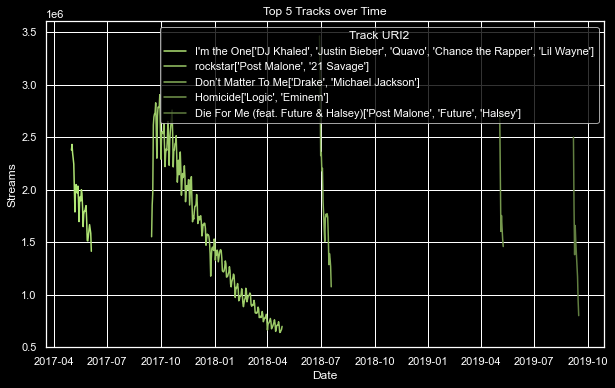

In [38]:
sns.lineplot(data = data3c, x = 'Date', y = 'Streams', 
             hue = 'Track URI2', units="Track URI2", estimator=None,
            legend=True)\
.set_title("Top 5 Tracks over Time")

The above two charts show the evolution of the number of streams over a song's lifetime on the chart, shown for the top 5 most streamed songs in the entire dataset. All songs tend to exhibit the same pattern: reaching their peak in the first 2-3 days of being on the chart, and then steadily decreasing after that. \
Note that the song 'rockstar' is associated with multiple Track URIs throughout its lifetime, which may present some issues when creating chart legends. 

Text(0.5, 1.0, 'Top 5 Tracks over Time')

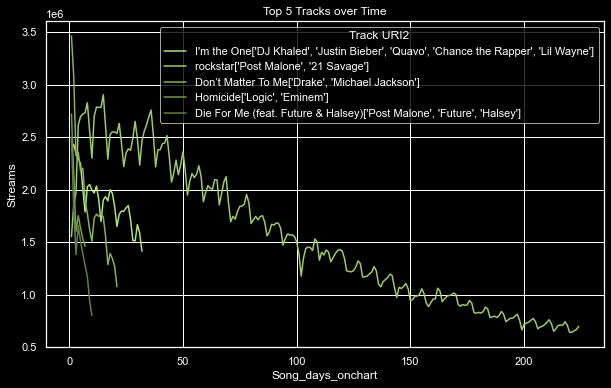

In [39]:
sns.lineplot(data = data3c, x = 'Song_days_onchart', y = 'Streams', 
             hue = 'Track URI2', units="Track URI2", estimator=None)\
.set_title("Top 5 Tracks over Time")

# plotting with Song_days_onchart allows all songs to start from the same point
# however, since rockstar has multiple Track URIs, 
# plotting using Song_days_onchart and Track Name will produce duplicate observations with Streams
# therefore, we need to specify Track URI as the hue, not Track Name

### Chart 4B - Artist Days on Chart metrics

In [41]:
data5 = top_us.copy()
data5b = data5[['Artist Name', 'Artist_days_onchart', 
               'Streams', 'Position', 'Revenue']]\
.drop_duplicates()

In [42]:
data5c = data5b.groupby(['Artist_days_onchart'])[['Streams', 'Position', 'Revenue']]\
.agg('mean')\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Revenue": "Avg Revenue"})

In [ ]:
data5c

Text(0.5, 1.0, 'Relationship between Artist Days on Chart and Average Streams')

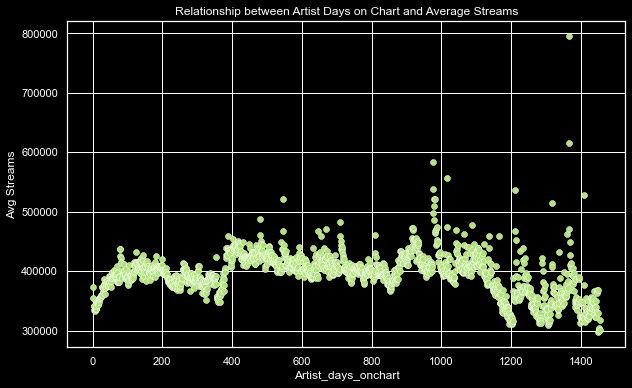

In [43]:
sns.scatterplot(data = data5c, x = 'Artist_days_onchart', y = 'Avg Streams')\
.set_title("Relationship between Artist Days on Chart and Average Streams")

This chart shows the average no. of streams, grouped by the no. of artist days on chart.
There does not seem to be any apparent relationship between the number of days an artist has been on the chart, and the average number of streams that artist's song garners. 